In [1]:
#konlpy.tag 설치 / 텍스트 마이닝
!sudo apt-get install python3-dev; pip3 install konlpy


# window용 시각화 폰트 / 실행 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 66.7 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ub

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#워드 클라우드 = 텍스트 마이닝
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [4]:
# 한글 폰트 plt 적용
plt.rc('font', family='NanumBarunGothic')

In [5]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/프로젝트/패캠 데이터_팀플/파이널프로젝트_RAW_210329_210926.xlsx')

In [ ]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634.0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500.0,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650.0,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000.0,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656.0,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658.0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


### 쿠폰 사용자의 비율

Text(0.5, 1.0, ' 쿠폰 사용자 비율')

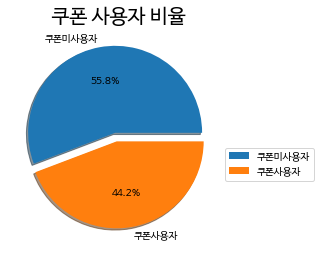

In [ ]:
coup_had = df3.loc[df3['coupon_discount_amount'] > 0, 'coupon_discount_amount'].count() # 쿠폰을 사용한 사람의 수
coup_not = df3.loc[df3['coupon_discount_amount'] == 0, 'coupon_discount_amount'].count() # 쿠폰을 사용하지 않은 사람의 수
pie_series = pd.Series([coup_not, coup_had], index = ['쿠폰미사용자', '쿠폰사용자'])
explode = pd.Series([0.05, 0.05], index = pie_series.index)
plt.pie(pie_series, labels = pie_series.index, autopct = '%.1f%%', shadow = True, explode = explode )
plt.legend(loc = (1, 0.3))
plt.title(' 쿠폰 사용자 비율', size = 20)

개인 구매자의 쿠폰 사용율은 55.8%가 나왔다.

Text(0, 0.5, '평균구매액')

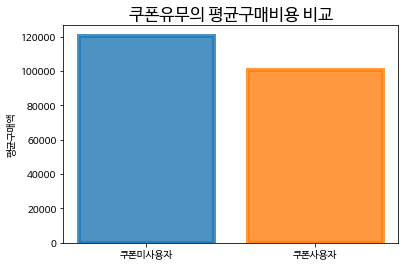

In [ ]:
coup_trans = df3.loc[df3['coupon_discount_amount'] > 0, 'transaction_amount'].mean() # 쿠폰사용자의 평균구매비용(할인액 포함)
notcoup_trans = df3.loc[df3['coupon_discount_amount'] == 0, 'transaction_amount'].mean() # 쿠폰미사용자의 평균구매비용
plt.bar(['쿠폰미사용자','쿠폰사용자'],[notcoup_trans, coup_trans], color = ['C0','C1'],edgecolor =  ['C0','C1'], alpha = 0.8, linewidth = 4)
plt.title('쿠폰유무의 평균구매비용 비교', fontsize = 17)
plt.ylabel('평균구매액')

평균 구매액 역시 쿠폰 미사용자가 높게 나왔다.

In [ ]:
df3[df3['coupon_discount_amount'] == 0]['method'].value_counts().to_frame('쿠폰을 사용하지 않은 고객들의 결제 수단')

,쿠폰을 사용하지 않은 고객들의 결제 수단
CARD,22299
POINT,4639
VBANK,1753
TRANSFER,703
TRANS,384
ONSITE,117
PROMOTION,13
VOUCHER,5


In [ ]:
df3[df3['coupon_discount_amount'] > 0]['method'].value_counts().to_frame('쿠폰을 사용한 고객들의 결제 수단')

,쿠폰을 사용한 고객들의 결제 수단
CARD,15046
PROMOTION,3486
POINT,3396
VBANK,1501
TRANS,295


In [ ]:
pay_counts.columns = ['순위', '구매횟수']
pay_counts.index.name = '고객번호'
pay_counts

,순위,구매횟수
고객번호,,
98685.0,1.0,53
427973.0,2.0,47
158374.0,3.0,42
50769.0,4.0,41
3189.0,5.0,40
1189.0,6.0,37
40783.0,7.0,34
276705.0,8.0,32
106662.0,9.0,29


### 텍스트 마이닝

In [ ]:
text = ''.join(s for s in df3['course_title'])

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

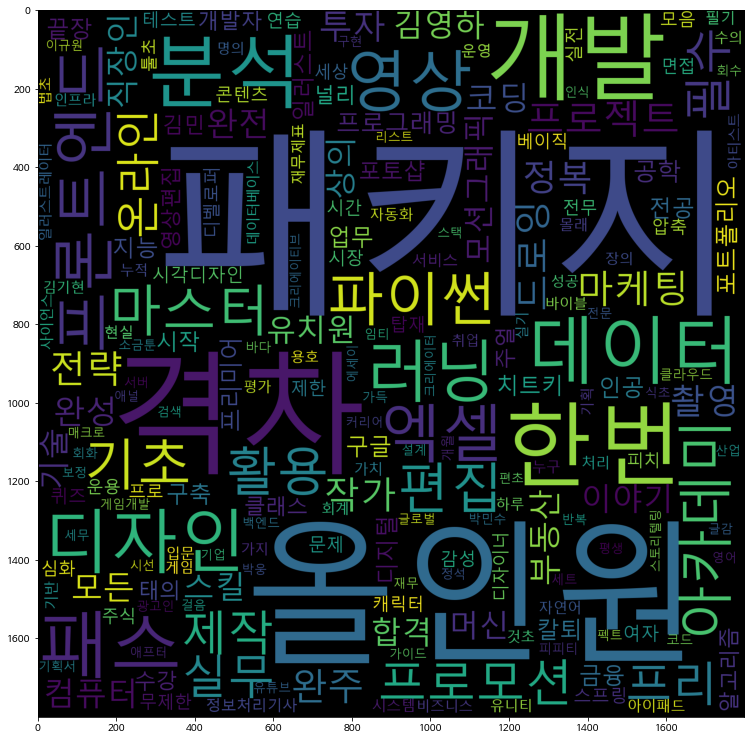

In [ ]:
# 폰트 추가 및 시각화
wc = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Toy Project/MALGUN.TTF', width=1800, height=1800, scale=1.0, max_font_size=500)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(27,13))
plt.imshow(gen)

In [ ]:
df3['course_title'].to_frame()

,course_title
26466,코딩+알고리즘 온라인 완주반 6기
71084,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+
22871,올인원 패키지 : 딥러닝을 활용한 추천시스템 구현
2366,올인원 패키지 : 파이썬 웹 개발
104241,편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨...
...,...
105381,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기"
105397,올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원
105395,초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin
105403,올인원 패키지 : 컴퓨터 공학 전공 필수


In [ ]:
text = text.replace('올인원','').replace('패키지','').replace('프로모션','').replace('온라인','').replace('초격차','')

In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

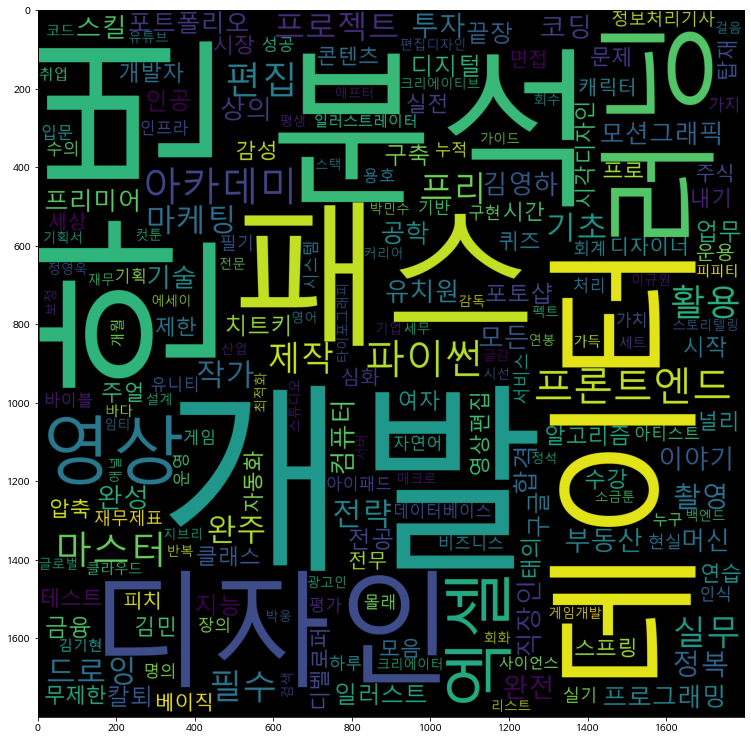

In [ ]:
wc = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Toy Project/MALGUN.TTF', width=1800, height=1800, scale=1.0, max_font_size=500)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(27,13))
plt.imshow(gen)